# Problem Statement : 

# Given above data build a machine learning model that can predict Loan Status

In [1]:
import pandas as pd # for data frame
import numpy as np # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
import seaborn as sns # for visualization

In [2]:
#loading dataset
df = pd.read_csv('loan_status.csv')
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [28]:
#shape of the data
df.shape

(30000, 16)

In [4]:
#getting info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [5]:
#describe numerical data
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,27992.000000,27494.000000,27130.000000,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.504160,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,61569.150299,60904.557498,58654.145088,54827.113904,51729.302253,51625.821980,12548.633278,1.849890e+04,12242.048527,11056.957868,11071.445005,13358.162766
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.000000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1574.000000,1556.000000,1534.000000,1433.000000,1327.000000,1261.000000,15.000000,1.400000e+01,8.000000,6.000000,5.000000,5.000000
50%,7483.500000,9.000000,33.000000,8551.500000,8697.500000,8889.500000,8671.000000,8131.500000,7819.000000,166.000000,1.640000e+02,119.000000,75.000000,75.000000,78.000000
75%,18746.250000,21.000000,41.000000,38251.750000,38605.500000,36534.250000,32855.000000,29680.500000,29459.750000,1667.000000,1.662000e+03,1381.250000,983.000000,982.000000,1133.000000
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [6]:
#printing all columns
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [7]:
#finding null values
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [8]:
#all columns which have null values
df.columns[df.isna().any()].tolist()

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [9]:
#filling null values with 0
df = df.fillna(0)

In [10]:
#finding null values
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

In [11]:
#encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Default Status"] = le.fit_transform(df["Default Status"])

#1 is for default and 0 for Not default

In [12]:
#split feature and target variable
X = df.drop("Default Status",axis=1)
y = df["Default Status"]

In [13]:
#split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [14]:
#classify model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [15]:
#train model 
model.fit(X_train,y_train)

GaussianNB()

In [16]:
#score on train data
model.score(X_train,y_train)

0.7469583333333333

In [17]:
#score on test data
model.score(X_test,y_test)

0.7506666666666667

In [20]:
#predict X test
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [24]:
#creating function that shows all metrics to evaluate the model


def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score : ",precision_score(y_test, y_pred))
    print("recall_score   : ",recall_score(y_test, y_pred))
    print("Accuracy       :  {}".format(accuracy))
    print("\nclassification Report for this Model\n")
    print(classification_report(y_test,y_pred,digits=5))
    print("\nConfusion Matrix for this Model\n")
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt=".1f",cmap="crest")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

pricison_score :  0.7789014821272886
recall_score   :  0.9514376996805112
Accuracy       :  0.7506666666666667

classification Report for this Model

              precision    recall  f1-score   support

           0    0.13962   0.02835   0.04713      1305
           1    0.77890   0.95144   0.85657      4695

    accuracy                        0.75067      6000
   macro avg    0.45926   0.48990   0.45185      6000
weighted avg    0.63986   0.75067   0.68052      6000


Confusion Matrix for this Model



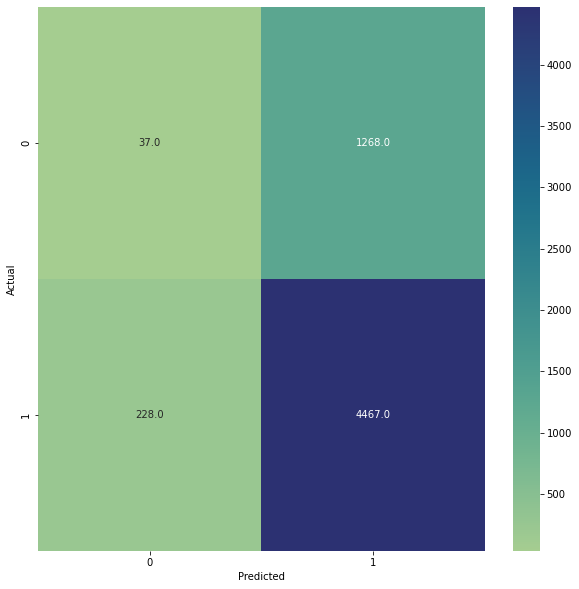

In [29]:
run_model(model,X_train, y_train, X_test, y_test)